# Introducció a K-NN amb Scikit Learn

**Autor**: Ramon Mateo Navarro

**Assignatura**: Sistemes d'aprenentatge automàtic

## Recordar de l'algorisme de k-NN:

* Calcula la distància entre el nou punt de dades amb cada exemple d'entrenament.
* Per calcular la distància s'utilitzaran mesures com la distància euclidiana, la distància de Hamming o la distància de Manhattan.
* El model selecciona K entrades a la base de dades que estan més properes al punt de dades nou.
* A continuació, fa el vot majoritari, és a dir, la classe/etiqueta més comuna entre aquestes K entrades serà la classe del nou punt de dades.

Per aquesta pràctica tocarà importar els mòduls de Pandas, Numpy, scikit learn. El conjunt de dades que es farà servir és el d'iris dataset que està inclòs en el package de sklearn. Podeu trobar més informació en aquest link: [iris dataset](https://archive.ics.uci.edu/dataset/53/iris).

## Imports


***Nota**:Sklearn/Scikit-learn son el mateix package*

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

Observem les dades:

In [2]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Podem observar com el conjunt de dades té 4 columnes amb diferents valors cada una.

Per saber els noms  i l'objectiu a predir podem fer: 

In [3]:
print("Columnes:", iris.feature_names)
print("Categories:", iris.target_names)

Columnes: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Categories: ['setosa' 'versicolor' 'virginica']


Si observem el tipus d'estructura de dades que fan servir veurem que son tot numpy arrays

In [4]:
print(type(iris.data), type(iris.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### Plotejem les dades

c:\Users\rmateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rmateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rmateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rmateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWar

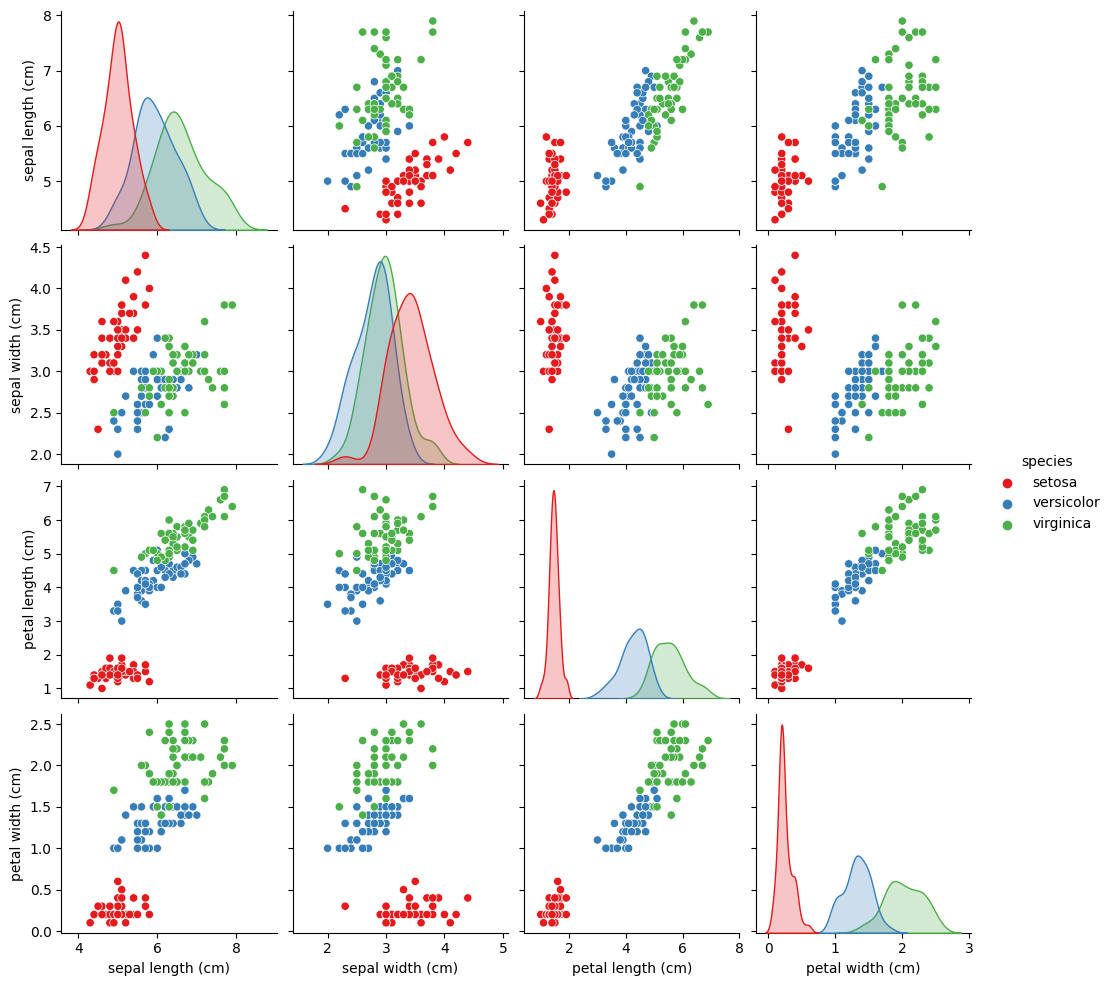

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

features_df = iris_df.drop(columns=['target'])

sns.pairplot(features_df, hue='species', palette='Set1')

# Mostra el gràfic.
plt.show()

### Analitzant la matriu de correlació

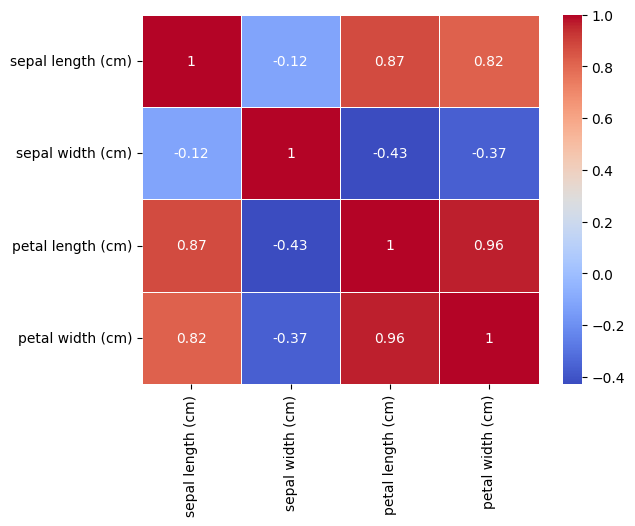

In [10]:

numeric_features = features_df.drop(columns='species')
correlation_matrix = numeric_features.corr()
# Crea un mapa de calor per visualitzar la matriu de correlació
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Mostra el gràfic
plt.show()



## Preparació de les dades

In [11]:
from sklearn.model_selection import train_test_split

# separem les dades en train i test

X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=4)

# Validem que el shape sigui el correcte i esperat
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


## Creant el model

Ara toca crear el model. No sabem quina serà la k òptima de veïns a seleccionar, per tant, el que es fa és iterar sobre diferents k i analitzar el seu resultat per veure quina és la k òptima.

In [13]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

scores = {}
scores_list = []
error_list = []
k_range = range(1,26)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(Y_test, y_pred)
    error_list.append(np.mean(y_pred != Y_test))
    scores_list.append(metrics.accuracy_score(Y_test, y_pred))


## Visualització dels models i la seva evolució:

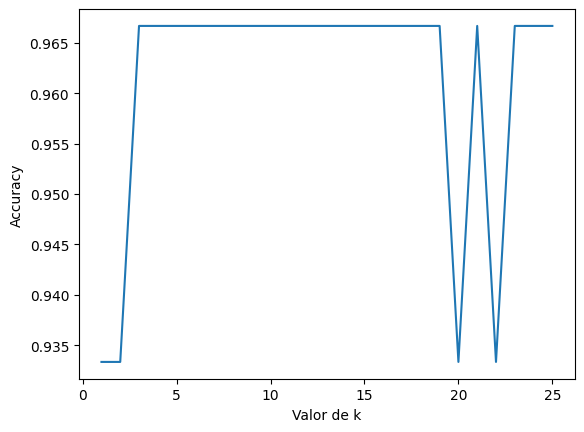

Minimum error:- 0.03333333333333333 at K = 2


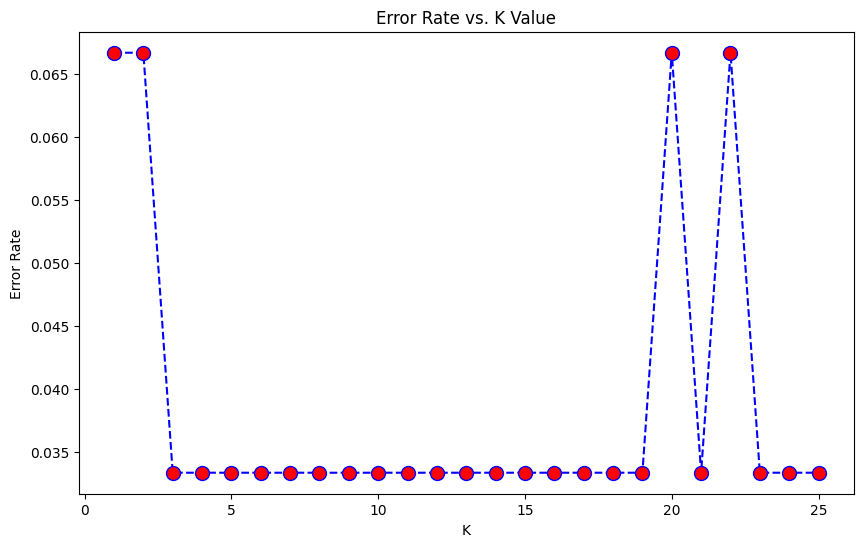

In [14]:
import matplotlib.pyplot as plt

plt.plot(range(1,26), scores_list)
plt.xlabel("Valor de k")
plt.ylabel("Accuracy")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(range(1,26),error_list,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_list),"at K =",error_list.index(min(error_list)))

## Exercici de pràctica:

Entreneu un model K-nn pel conjunt de dades MNIST. Podeu trobar més informació a [MNIST Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Carrega el conjunt de dades MNIST
digits = datasets.load_digits()

# Pista, heu de pensar que és una imatge/matriu i per el knn necessitem que sigui un vector . 
# Per exemple si és l'imatge de 4x4 hem de passar d'una matriu de 4x4 a un únic vector de 16 elements
